In [2]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=23c24faf38a36ab4d53e683c9b2209edbf340309d50d3ae93ec1eb992bf74faf
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [98]:
pip freeze>requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [99]:
%%html
<img src="https://metrouni.edu.bd/wp-content/themes/uwms_v3/assets/metro/images/logo.png", width=370,height=250>

# <font color="midnightblue">“Department of CSE”</font>
**COVID-19 ANALYSIS**

<font color="lightslategray">SUBMITTED BY:</font> 

             TEAM MU TITANS
             ................
             SYEDA SADIA ALAM
             191-115-091
             CSE 47(C)      
             ..............&
             MITA RANI GOUSH
             191-115-109
             CSE 47(C)
                                
<font color="lightslategray">SUBMITTED TO:</font> 
                   
             MANAL AYMAAN
             LECTURER,CSE,MU

In [4]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [101]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [102]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"COVID-19 Detection X-Ray",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE 
)

Found 2152 files belonging to 3 classes.


In [103]:
class_names = dataset.class_names
class_names

['Covid 19', 'Normal', 'ViralPneumonia (ARDS)']

In [104]:
len(dataset)

68

In [105]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 2 2 2 2 2 2 1 2 2 2 0 2 0 2 0 2 0 2 2 2 0 0 0 2 2 2 1 2 2 2]


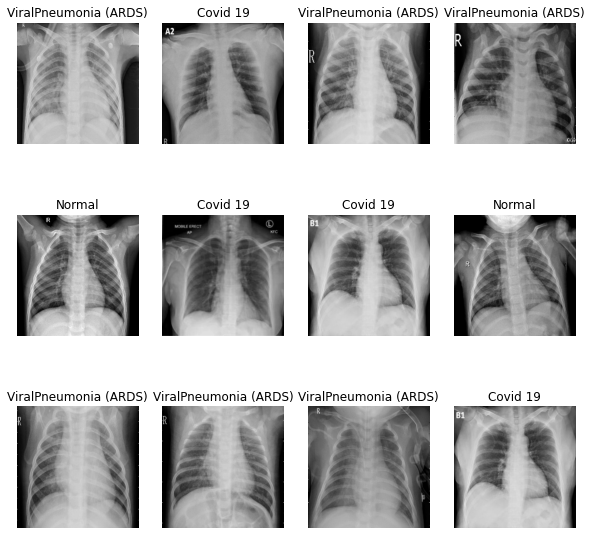

In [106]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [107]:
len(dataset)

68

80% ==> training
20% ==> 10% validation, 10% test

In [108]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [109]:
train_ds = dataset.take(54)
len(train_ds)

54

In [110]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [111]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [112]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [113]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [114]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [115]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [116]:
len(train_ds)

54

In [117]:
len(val_ds)

6

In [118]:
len(test_ds)

8

In [119]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [120]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [121]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [122]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [123]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 110s 1s/step - loss: 0.6987 - accuracy: 0.7089 - val_loss: 0.2722 - val_accuracy: 0.9167
Epoch 2/50
54/54 [==============================] - 77s 1s/step - loss: 0.2269 - accuracy: 0.9201 - val_loss: 0.1776 - val_accuracy: 0.9062
Epoch 3/50
54/54 [==============================] - 78s 1s/step - loss: 0.1963 - accuracy: 0.9213 - val_loss: 0.2144 - val_accuracy: 0.9271
Epoch 4/50
54/54 [==============================] - 79s 1s/step - loss: 0.1364 - accuracy: 0.9554 - val_loss: 0.0947 - val_accuracy: 0.9688
Epoch 5/50
54/54 [==============================] - 75s 1s/step - loss: 0.0711 - accuracy: 0.9734 - val_loss: 0.0463 - val_accuracy: 0.9792
Epoch 6/50
54/54 [==============================] - 75s 1s/step - loss: 0.1131 - accuracy: 0.9664 - val_loss: 0.0772 - val_accuracy: 0.9792
Epoch 7/50
54/54 [==============================] - 77s 1s/step - loss: 0.0564 - accuracy: 0.9809 - val_loss: 0.0547 - val_accuracy: 0.9792
Epoch 8/50
54/54 [=

In [124]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 16s 266ms/step - loss: 1.1085 - accuracy: 0.4492


In [125]:
scores

[1.1085439920425415, 0.44921875]

In [126]:
history

In [127]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

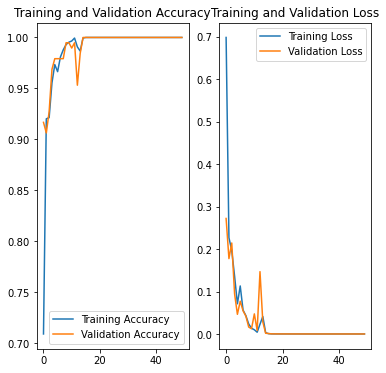

In [130]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [131]:
np.argmax([9.9999964e-01,3.9333537e-07,1.1586251e-18])

0

first image to predict
actual label: ViralPneumonia (ARDS)
1/1 [==============================] - 0s 370ms/step
predicted label: Covid 19


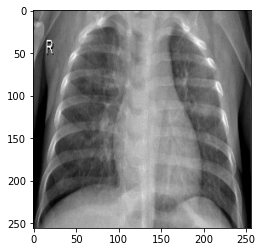

In [132]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [133]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


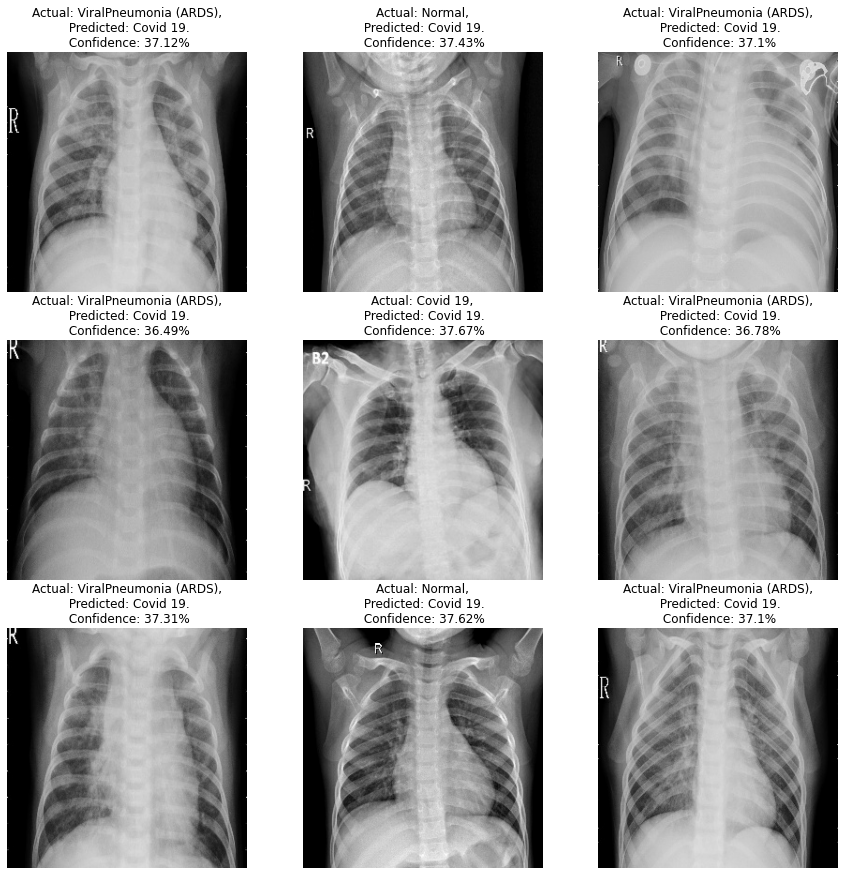

In [134]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [135]:
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [136]:
model.save("../Covid.h5")